# CVAE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler

import base
import cvae
import importlib
importlib.reload(cvae)

2022-06-02 16:23:00.799177: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-02 16:23:00.799219: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


<module 'cvae' from '/home/notebook/private/model/latent_model/market_simulator-master/notebooks/../src/cvae.py'>

In [2]:
generator = cvae.CVAE(n_latent=4, alpha=0.02)

## Create the data

In [3]:
data, conditions = make_circles(n_samples=10000, noise=0.05, factor=0.5)

# We normalise the data to [0, 1]^2
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

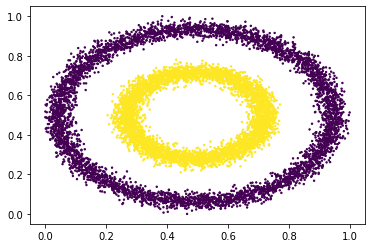

In [4]:
# Plot dataset
plt.scatter(*data.T, c=conditions, s=2)
plt.show()

# Train the CVAE

In [5]:
generator = cvae.CVAE(n_latent=4, alpha=0.02)
generator.train(data, data_cond=conditions.reshape(-1, 1),
                n_epochs=10000)

/home/notebook/private/model/latent_model/market_simulator-master/notebooks/../src/cvae.py:24: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  x = tf.layers.flatten(x)
/home/notebook/private/model/latent_model/market_simulator-master/notebooks/../src/cvae.py:25: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  x = tf.layers.dense(x, units=self.n_hidden, activation=self.lrelu)
/home/notebook/private/model/latent_model/market_simulator-master/notebooks/../src/cvae.py:26: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  mn = tf.layers.dense(x, units=self.n_latent, activation=self.lrelu)
/home/notebook/private/model/latent_model/market_simulator-master/notebooks/../src/cvae.py:27: UserWarning: `tf.layers.dense` is deprecated and will be rem

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

# Generate samples

In [6]:
outer_circle_generated = generator.generate((0,), n_samples=1000)
inner_circle_generated = generator.generate((1,), n_samples=1000)

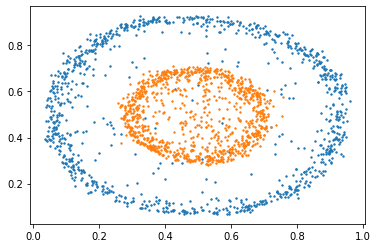

In [7]:
plt.scatter(*outer_circle_generated.T, s=2)
plt.scatter(*inner_circle_generated.T, s=2)
plt.show()